In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from pyclustering.cluster import cluster_visualizer_multidim
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from sklearn.decomposition import PCA
from pyclustering.cluster.silhouette import silhouette
from sklearn.metrics import silhouette_score
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.silhouette import silhouette_ksearch_type, silhouette_ksearch
from sklearn.cluster import OPTICS
from pyclustering.cluster.optics import optics, ordering_analyser, ordering_visualizer

In [ ]:
df=pd.read_csv('df_RFE_6Class_LOF.csv')
df2=df.drop(columns=['Unnamed: 0','label'])

In [ ]:
df2.head()

,tBodyAcc-entropy()-X,"tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-Y,tGravityAcc-max()-X,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-energy()-Y,"tGravityAcc-arCoeff()-Y,1",...,fBodyAcc-max()-X,fBodyAcc-max()-Y,fBodyAccJerk-max()-Y,"fBodyAccJerk-bandsEnergy()-1,16",fBodyGyro-maxInds-X,fBodyGyro-meanFreq()-X,fBodyAccMag-mad(),fBodyAccMag-energy(),fBodyBodyGyroJerkMag-std(),"angle(Y,gravityMean)"
0,-0.714892,-0.013429,0.579382,-0.141551,0.892060,0.122586,0.984520,-0.114893,-0.970583,-0.196359,...,-0.999372,-0.973770,-0.984923,-0.999987,-1.000000,-0.048167,-0.975777,-0.999472,-0.996399,0.180289
1,-0.592235,-0.124698,0.608900,-0.142010,0.892401,0.094566,0.986770,-0.114893,-0.970368,-0.329023,...,-0.998158,-0.963072,-0.985351,-0.999963,-1.000000,-0.216685,-0.985594,-0.999807,-0.995127,0.180637
2,-0.627446,-0.305693,0.507459,-0.143976,0.893817,0.093425,0.986821,-0.121336,-0.969400,-0.295036,...,-0.997404,-0.987275,-0.987874,-0.999978,-1.000000,0.216862,-0.983524,-0.999770,-0.995237,0.181935
3,-0.786553,-0.155804,0.599213,-0.148750,0.893817,0.091682,0.987434,-0.121834,-0.967051,-0.166693,...,-0.999277,-0.980848,-0.990373,-0.999988,-1.000000,-0.153343,-0.992324,-0.999873,-0.995465,0.185151
4,-0.751869,-0.209979,0.180424,-0.148210,0.893683,0.083347,0.987722,-0.121834,-0.967321,-0.198125,...,-0.998598,-0.993414,-0.992801,-0.999987,-0.933333,-0.363040,-0.993851,-0.999939,-0.995239,0.184823


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7037 entries, 0 to 7036
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tBodyAcc-entropy()-X             7037 non-null   float64
 1   tBodyAcc-correlation()-X,Y       7037 non-null   float64
 2   tBodyAcc-correlation()-Y,Z       7037 non-null   float64
 3   tGravityAcc-mean()-Y             7037 non-null   float64
 4   tGravityAcc-max()-X              7037 non-null   float64
 5   tGravityAcc-max()-Z              7037 non-null   float64
 6   tGravityAcc-min()-X              7037 non-null   float64
 7   tGravityAcc-min()-Y              7037 non-null   float64
 8   tGravityAcc-energy()-Y           7037 non-null   float64
 9   tGravityAcc-arCoeff()-Y,1        7037 non-null   float64
 10  tGravityAcc-arCoeff()-Y,3        7037 non-null   float64
 11  tGravityAcc-arCoeff()-Z,2        7037 non-null   float64
 12  tGravityAcc-arCoeff(

In [ ]:
X = df2.values
y = np.array(df['label'])

In [ ]:
test = pd.read_csv('df_RFE_test.csv')
test2=test.drop(columns=['Unnamed: 0','label'])

In [ ]:
Xtest= test2.values
ytest = np.array(test['label'])

In [ ]:
xm = xmeans.xmeans(X)
xm.process()

In [ ]:
clusters = xm.get_clusters()

In [ ]:
len(clusters)

20

In [ ]:
centers = xm.get_centers()

In [ ]:
np.array(centers)

array([[-0.38228557, -0.57435861,  0.60898238,  0.10060641,  0.83927936,
         0.20936369,  0.89165732,  0.09108361, -0.91757605, -0.77131   ,
        -0.76401414,  0.79623087,  0.80151497, -0.85790493,  0.8008165 ,
        -0.26856605, -0.54174868, -0.98625261, -0.24737771, -0.963092  ,
        -0.85539879, -0.97100251, -0.99968839, -0.91557178, -0.13528597,
        -0.8746732 , -0.96966199, -0.97397123,  0.01239515],
       [-0.25996324,  0.41241845,  0.62928972, -0.18390375,  0.86375632,
        -0.07996207,  0.93049008, -0.18407902, -0.92125426, -0.78333264,
        -0.77643597,  0.81496197,  0.82077103, -0.8255074 ,  0.78387945,
        -0.32567844, -0.60847443, -0.98115681, -0.26003171, -0.97219022,
        -0.8527066 , -0.96539254, -0.99950013, -0.92689211, -0.32266622,
        -0.88610804, -0.98055727, -0.96546889,  0.2097114 ],
       [-0.55732901, -0.0387893 , -0.19570997, -0.01703656,  0.86054639,
         0.05453864,  0.95210229,  0.00541163, -0.93909664, -0.42984191,
  

In [ ]:
xm.get_total_wce()

5133.565826126523

In [ ]:
i = df2.columns.values.tolist().index('tBodyAcc-entropy()-X')
j = df2.columns.values.tolist().index('tBodyAcc-correlation()-X,Y')

In [ ]:
i3 = df2.columns.values.tolist().index('fBodyAcc-max()-X')
j3 = df2.columns.values.tolist().index('tGravityAcc-min()-Y')

In [ ]:
i4 = df2.columns.values.tolist().index('tGravityAcc-max()-X')
j4 = df2.columns.values.tolist().index('tGravityAcc-min()-X')

In [ ]:
X_pca[:,1]

array([-0.60732651, -0.63364385, -0.56488202, ...,  0.06618337,
        0.02992452,  0.00838642])

### MinMax Scaler

In [ ]:
X2 = MinMaxScaler().fit_transform(X)

In [ ]:
xm2 = xmeans.xmeans(X2)
xm2.process()

In [ ]:
clusters2 = xm2.get_clusters()

In [ ]:
len(clusters2)

20

In [ ]:
centers2 = xm2.get_centers()

In [ ]:
pca = PCA(n_components=3)
pca.fit(X2)
X_pca = pca.transform(X2)

In [ ]:
pca2 = PCA(n_components=2)
pca2.fit(X2)
X_pca2 = pca2.transform(X2)

In [ ]:
X_pca.shape

(7037, 3)

In [ ]:
X_pca[:,1]

array([-0.60732651, -0.63364385, -0.56488202, ...,  0.06618337,
        0.02992452,  0.00838642])

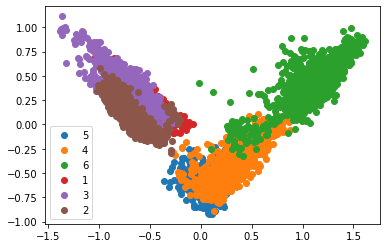

In [ ]:
for i in df['label'].unique():
    plt.scatter(X_pca[df['label'] == i][:,0], X_pca[df['label'] == i][:,1], label=i)

plt.legend()

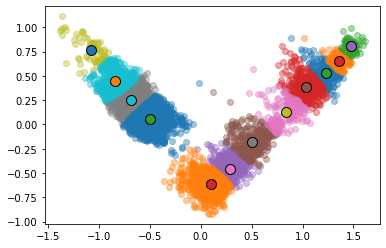

In [ ]:

for indexes in clusters:
    plt.scatter(X_pca[indexes,i], X_pca[indexes,j], alpha=0.4)
for c in centers:
    plt.scatter(c[i], c[j], s=100, edgecolors='k')

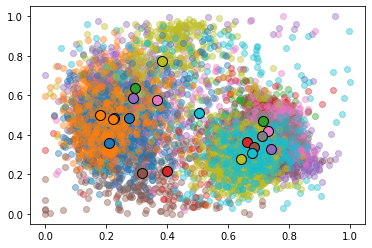

In [ ]:
for indexes in clusters2:
    plt.scatter(X2[indexes,i], X2[indexes,j], alpha=0.4)
for c in centers2:
    plt.scatter(c[i], c[j], s=100, edgecolors='k')

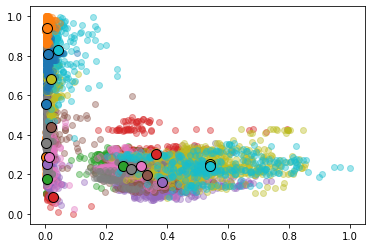

In [ ]:
for indexes in clusters2:
    plt.scatter(X2[indexes,i3], X2[indexes,j3], alpha=0.4)
for c in centers2:
    plt.scatter(c[i3], c[j3], s=100, edgecolors='k')

(array([  29.,   94.,  250.,  405.,  605.,  719.,  893., 1159., 1546.,
        1337.]),
 array([-0.32338317, -0.20616102, -0.08893887,  0.02828327,  0.14550542,
         0.26272757,  0.37994971,  0.49717186,  0.61439401,  0.73161615,
         0.8488383 ]),
 <BarContainer object of 10 artists>)

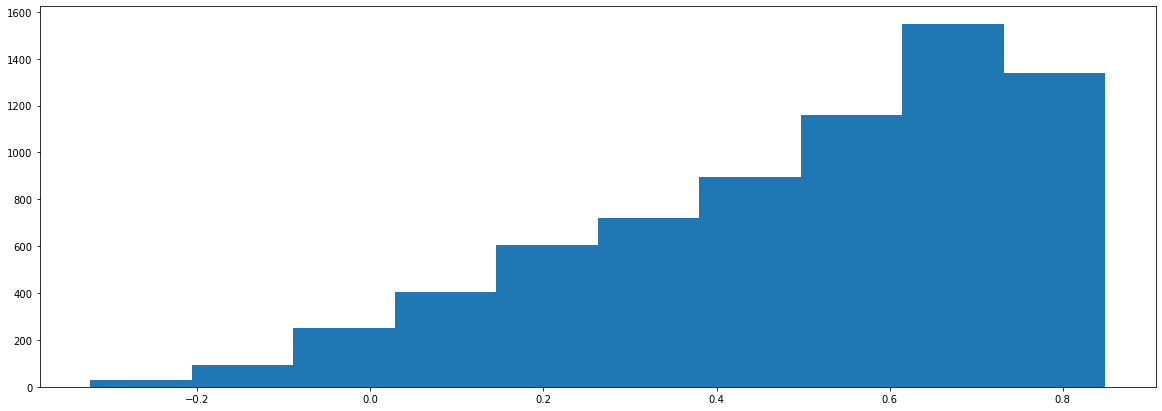

In [ ]:
# Silhouette score
score=silhouette(X_pca, clusters).process().get_score()
plt.hist(score)

Total WCE: 276.38184217564316


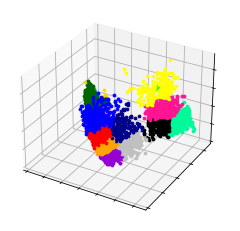

16


In [ ]:
# Initial center
amount_initial_centers = 1
initial_centers = kmeans_plusplus_initializer(X_pca, amount_initial_centers).initialize()
xmeans_instance = xmeans(X_pca, initial_centers,30)
xmeans_instance.process()
clusters = xmeans_instance.get_clusters()
centers = xmeans_instance.get_centers()
# Print error
print("Total WCE:", xmeans_instance.get_total_wce())

visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, X_pca)
visualizer.append_cluster(centers, None, marker='*')
visualizer.show()


print( len(clusters) )

In [ ]:
len(X2) == len(clusters2)

False

Scores: '{2: 0.6700271951552738, 3: 0.7711513811519497, 4: 0.663926941363581, 5: 0.6828736428283901, 6: 0.6042565756394545, 7: 0.5752927153217227, 8: 0.5747064035968394, 9: 0.5229885305989153, 10: 0.5079328466718472, 11: 0.5189059634714296, 12: 0.4782148182286402, 13: 0.49763279134735156, 14: 0.46380321052797974, 15: 0.492880807243666, 16: 0.46582441636802197, 17: 0.443659578907903, 18: 0.4591867103811023, 19: 0.4580420893211781}'


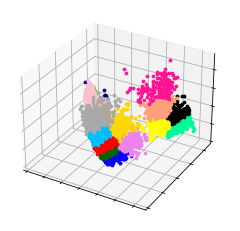

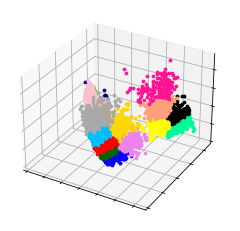

In [ ]:
search_instance = silhouette_ksearch(X_pca, 2, 20, algorithm=silhouette_ksearch_type.KMEANS).process()
amount = search_instance.get_amount()
scores = search_instance.get_scores()
print("Scores: '%s'" % str(scores))
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, X_pca)
visualizer.show()

Total WCE: 266.7011075150376


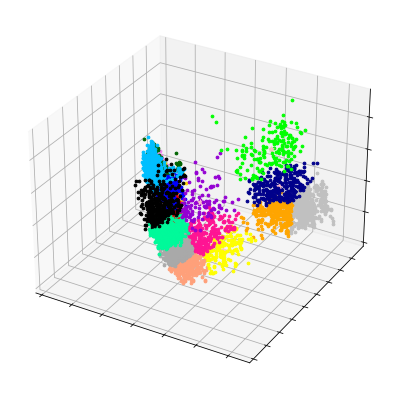

17


In [ ]:
# Initial center
amount_initial_centers = 1
initial_centers = kmeans_plusplus_initializer(X_pca, amount_initial_centers).initialize()
xmeans_instance = xmeans(X_pca, initial_centers,30)
xmeans_instance.process()
clusters = xmeans_instance.get_clusters()
centers = xmeans_instance.get_centers()
# Print error
print("Total WCE:", xmeans_instance.get_total_wce())

visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, X_pca)
visualizer.append_cluster(centers, None, marker='*')
visualizer.show()

print( len(clusters) )

Total WCE: 125.40041838773153


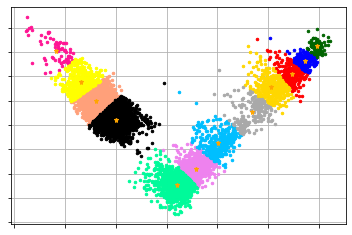

12


In [ ]:
# Initial center
amount_initial_centers = 1
initial_centers = kmeans_plusplus_initializer(X_pca2, amount_initial_centers).initialize()
xmeans_instance = xmeans(X_pca2, initial_centers,30)
xmeans_instance.process()
clusters = xmeans_instance.get_clusters()
centers = xmeans_instance.get_centers()
# Print error
print("Total WCE:", xmeans_instance.get_total_wce())

visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, X_pca2)
visualizer.append_cluster(centers, None, marker='*')
visualizer.show()

print( len(clusters) )

(array([  34.,   31.,  142.,  258.,  296.,  497.,  826., 1195., 2075.,
        1683.]),
 array([-0.58262165, -0.43565539, -0.28868913, -0.14172287,  0.00524339,
         0.15220965,  0.29917591,  0.44614217,  0.59310843,  0.74007469,
         0.88704095]),
 <BarContainer object of 10 artists>)

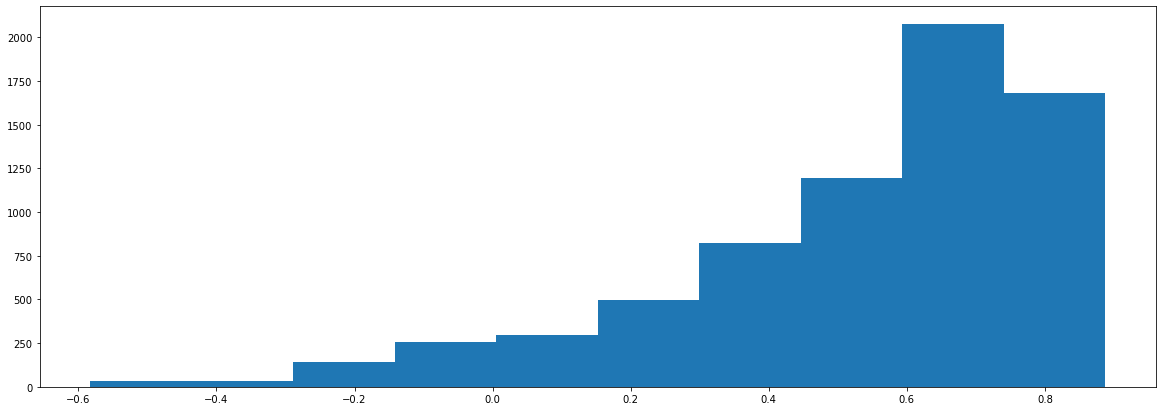

In [ ]:
# Silhouette score
score2=silhouette(X_pca2, clusters).process().get_score()
plt.hist(score2)

In [ ]:
i2 = df2.columns.values.tolist().index('tBodyAcc-entropy()-X')
j2 = df2.columns.values.tolist().index('tGravityAcc-mean()-Y')

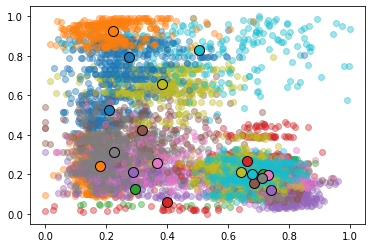

In [ ]:
for indexes in clusters2:
    plt.scatter(X2[indexes,i2], X2[indexes,j2], alpha=0.4)
for c in centers2:
    plt.scatter(c[i2], c[j2], s=100, edgecolors='k')

# OPTICS

In [ ]:
optics1 = OPTICS(min_samples=5, max_eps=np.inf, eps=0.03)
optics1.fit(X2)

OPTICS(eps=0.03)

In [ ]:
optics1.labels_

array([-1, -1, -1, ..., -1, -1, -1])

In [ ]:
optics1.ordering_

array([   0,    1, 4158, ..., 6052, 6225, 6042])

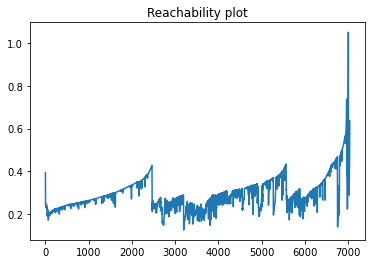

In [ ]:
# reachability plot
reachability1 = optics1.reachability_[optics1.ordering_]
plt.plot(reachability1)
plt.title('Reachability plot')
plt.show()

In [ ]:
silhouette_score(X2[optics1.labels_ != -1], optics1.labels_[optics1.labels_ != -1])

0.3769109730382659

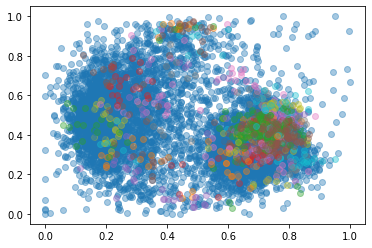

In [ ]:
for cluster_id in np.unique(optics.labels_)[:]:
    indexes = np.where(optics.labels_==cluster_id)
    plt.scatter(X2[indexes,i], X2[indexes,j], alpha=0.4)

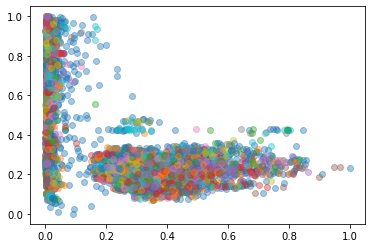

In [ ]:
for cluster_id in np.unique(optics1.labels_)[:]:
    indexes = np.where(optics1.labels_==cluster_id)
    plt.scatter(X2[indexes,i3], X2[indexes,j3], alpha=0.4)

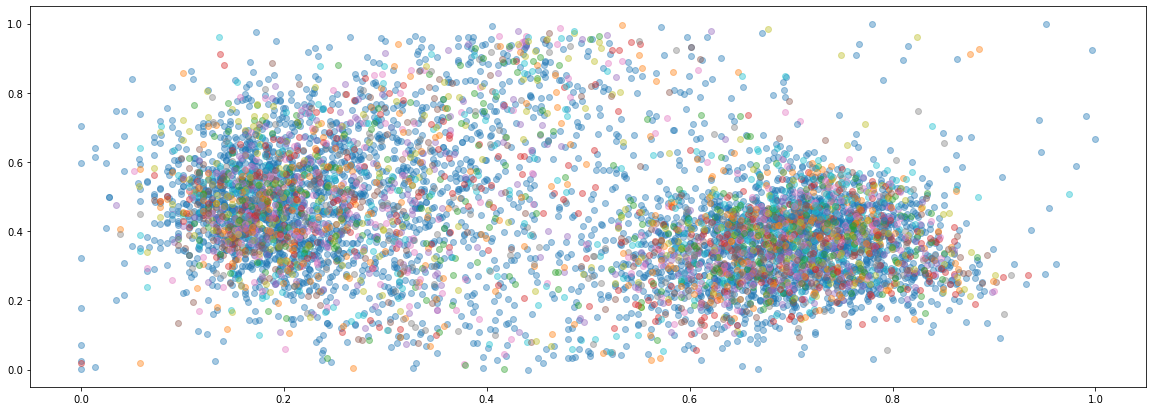

In [ ]:
for cluster_id in np.unique(optics1.labels_)[:]:
    indexes = np.where(optics1.labels_==cluster_id)
    plt.scatter(X2[indexes,i], X2[indexes,j], alpha=0.4)

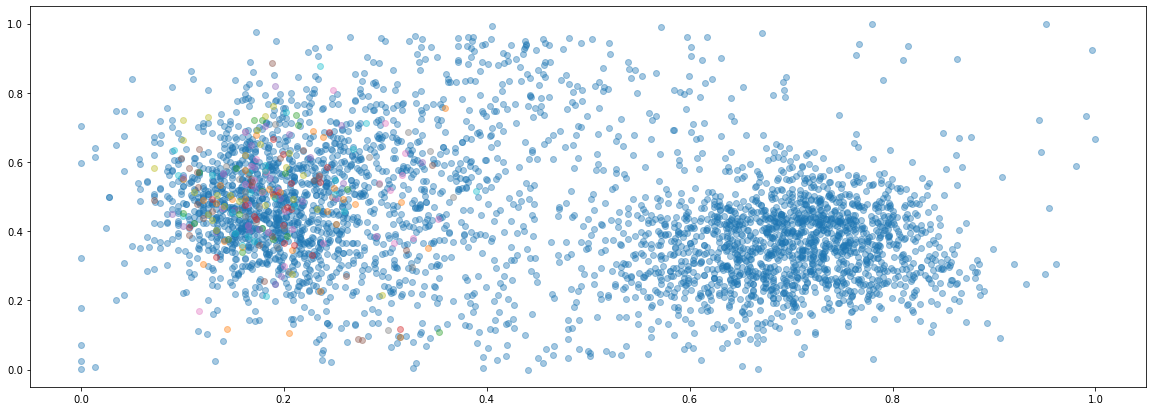

In [ ]:
for cluster_id in np.unique(optics1.labels_)[:30]:
    indexes = np.where(optics1.labels_==cluster_id)
    plt.scatter(X2[indexes,i], X2[indexes,j], alpha=0.4)

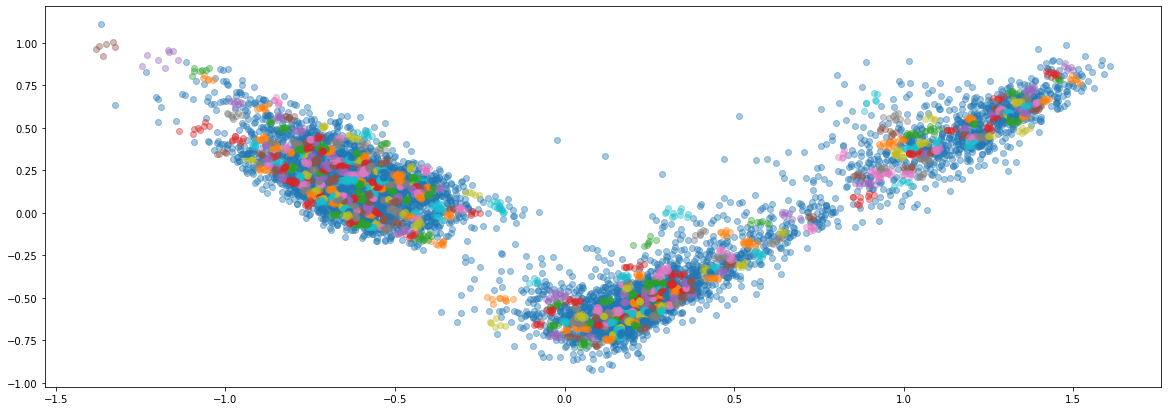

In [ ]:
for cluster_id in np.unique(optics.labels_)[:]:
    indexes = np.where(optics.labels_==cluster_id)
    plt.scatter(X_pca2[indexes,i], X_pca2[indexes,j], alpha=0.4)

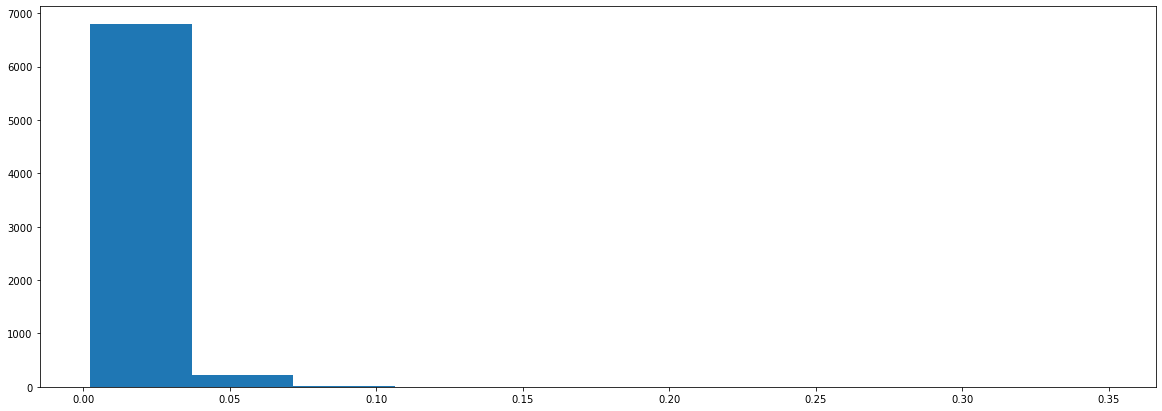

In [ ]:
plt.hist(optics.reachability_[1:])
plt.show()

In [ ]:
optics = OPTICS(min_samples=4, max_eps=np.inf, cluster_method='dbscan', eps=0.08)
optics.fit(X_pca2)

OPTICS(cluster_method='dbscan', eps=0.08, min_samples=4)

In [ ]:
silhouette_score(X_pca2[optics.labels_ != -1], optics.labels_[optics.labels_ != -1])

0.5432488376293741

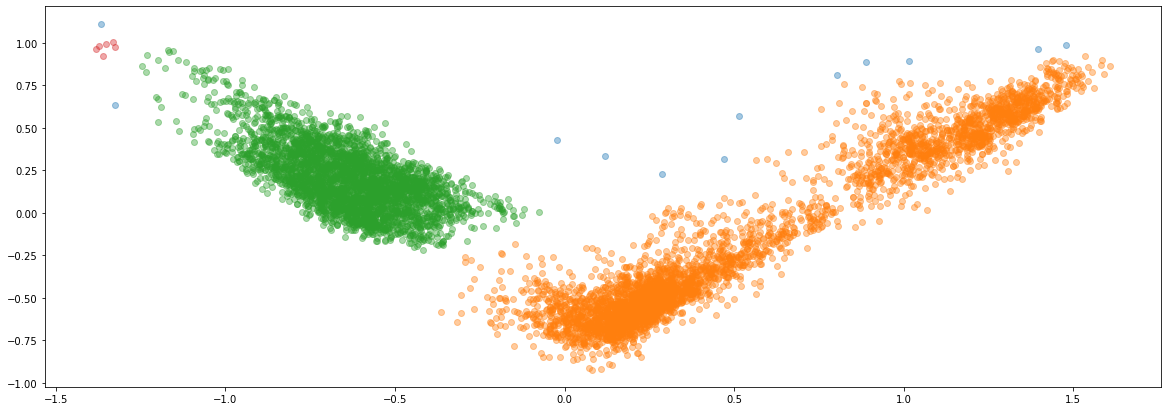

In [ ]:
for cluster_id in np.unique(optics.labels_)[:]:
    indexes = np.where(optics.labels_==cluster_id)
    plt.scatter(X_pca2[indexes,i], X_pca2[indexes,j], alpha=0.4)

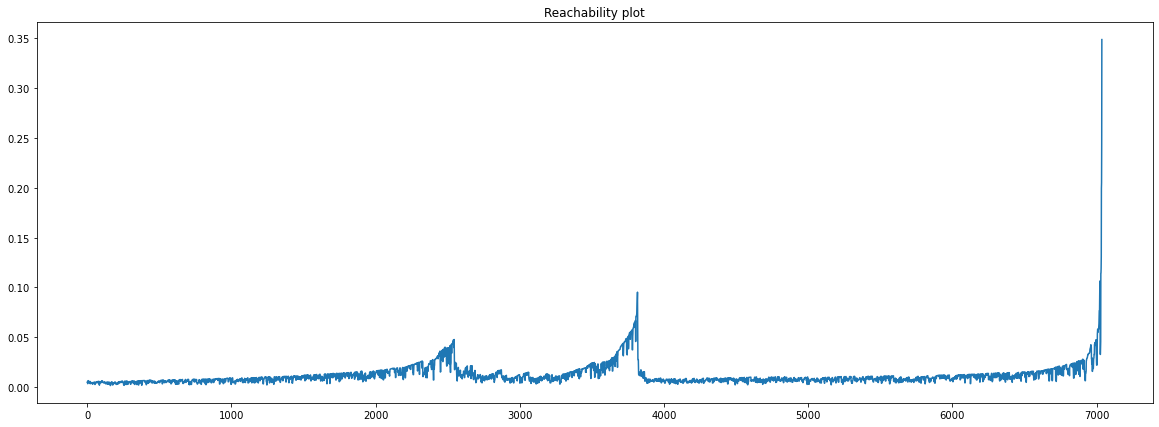

In [ ]:
# Reachability plot
reachability = optics.reachability_[optics.ordering_]
plt.plot(reachability)
plt.title('Reachability plot')
plt.show()

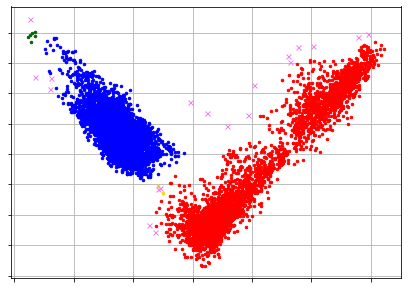

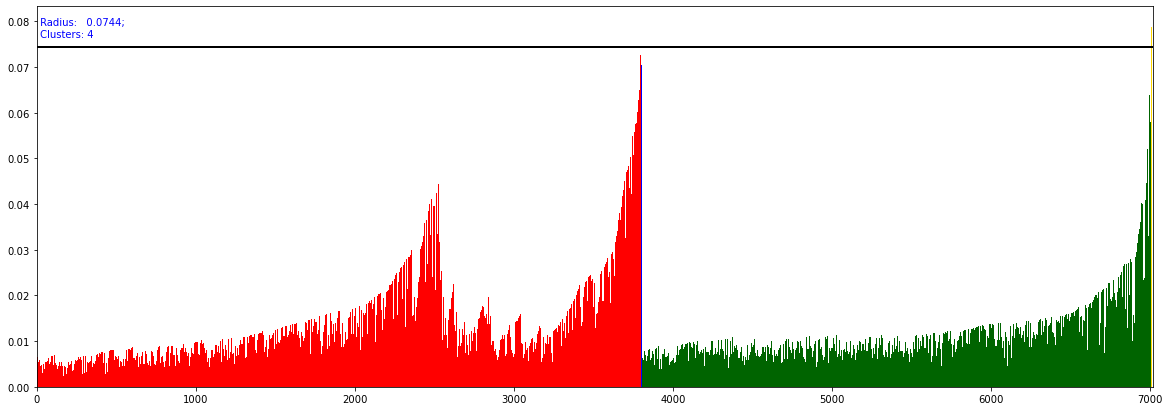

In [ ]:
# Initialize connectivity radius bigger than real.
radius = 0.08
neighbors = 4
optics_instance = optics(X_pca2, radius, neighbors)

optics_instance.process()
clusters3 = optics_instance.get_clusters()
noise = optics_instance.get_noise()
ordering = optics_instance.get_ordering()

plt.rcParams["figure.figsize"] = (7,5)

visualizer = cluster_visualizer()
visualizer.append_clusters(clusters3, X_pca2)
visualizer.append_cluster(noise, X_pca2, marker='x')
visualizer.show()

plt.rcParams["figure.figsize"] = (20,7)

analyser = ordering_analyser(ordering)
ordering_visualizer.show_ordering_diagram(analyser,4)

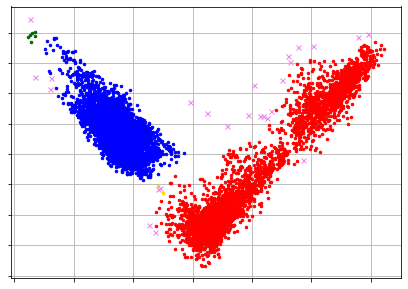

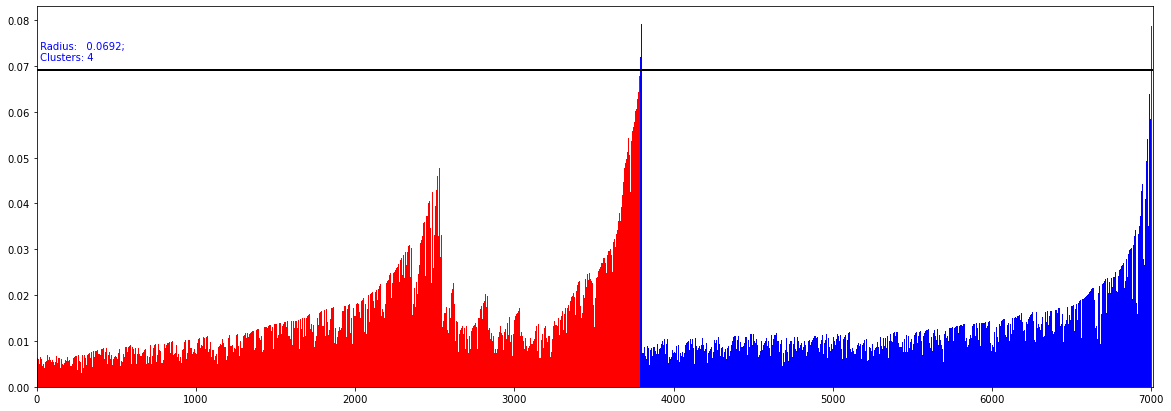

In [ ]:
radius = 0.08
minpts=5
optics_instance = optics(X_pca2, radius, minpts)

optics_instance.process()
clusters3 = optics_instance.get_clusters()
noise = optics_instance.get_noise()
ordering = optics_instance.get_ordering()

plt.rcParams["figure.figsize"] = (7,5)

visualizer = cluster_visualizer()
visualizer.append_clusters(clusters3, X_pca2)
visualizer.append_cluster(noise, X_pca2, marker='x')
visualizer.show()

plt.rcParams["figure.figsize"] = (20,7)

analyser = ordering_analyser(ordering)
ordering_visualizer.show_ordering_diagram(analyser,4)